In [1]:
import os
import sys

os.chdir('..')
sys.path.append(os.getcwd())

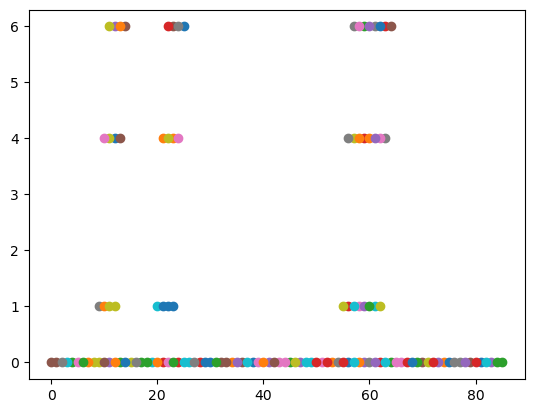

In [3]:
import matplotlib.pyplot as plt
from radartools.config.python_config import load_python_config

settings = '../settings/processing.py'
config = load_python_config(settings)

rxl, txl = config.layout['rxl'], config.layout['txl']
######### plot virtual array layout #########
x = []
y = []
va_pos = []
for tidx, taz, tel in txl:
    for ridx, raz, rel in rxl:
        x.append(taz+raz) # RX_id_tot in MATLAB
        y.append(tel+rel) # RX_id_tot_ele in MATLAB
        va_pos.append((taz+raz, tel+rel))
# remove duplicates
va_pos = list(set(va_pos))

# plot the virtual antenna array layout
for _, __ in va_pos:
        plt.plot(_, __, 'o')
#############################################

### Plot azimuth only array index in 16*12 MIMO array
- Number besides the dot means the index of antenna in the virtual azimuth-only array *(86 total for AWR2243)*.
- Dot(●) means the antenna is used in the virtual azimuth-only array.
- Cross(×) means the antenna is not used in the virtual azimuth-only array.

In [4]:
# MATLAB version array selection
import numpy as np
x = np.array(x)
y = np.array(y)
ind = np.where(y==0)[0] # return value is a tuple, [0] is just to get the array, contents are same
val, ID_unique = np.unique(x[ind], return_index=True)
antenna_azimuthonly = ind[ID_unique]

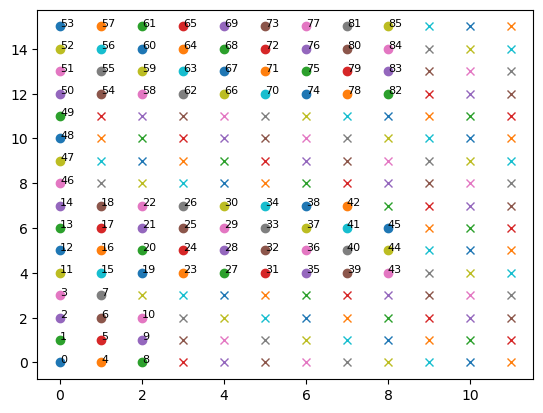

In [5]:
rx_tx_matrix = np.arange(12*16).reshape(16, 12, order='F')
# plot dots in rx_tx_matrix if the corresponding element in antenna_azimuthonly is not zero
for yn in range(16):
    for xn in range(12):
        if rx_tx_matrix[yn, xn] in antenna_azimuthonly:
            antenna_idx = np.where(antenna_azimuthonly==rx_tx_matrix[yn, xn])[0][0]
            plt.text(xn, yn, antenna_idx, fontsize=8) # the array order in azimuth array line
            plt.plot(xn, yn, 'o')
        else:
            plt.plot(xn, yn, 'x')

# following codes perform the same function as the above codes
# but the column/row first order is a little bit ambiguous so i don't want to use it

# ## plot antenna_azimuthonly in 16*12 matrix
# # for yn in range(16):
# #     for xn in range(12):
# #         # yn+xn*16 uses row major, yn*12+xn is wrong beacuse it is column major, related to the reshape order used in MATLAB
# #         if yn+xn*16 in antenna_azimuthonly:
# #             # add antenna_idx beside the point, antenna_idx is the index of virtual antenna array
# #             antenna_idx = np.where(antenna_azimuthonly==yn+xn*16)[0][0]
# #             plt.text(xn, yn, antenna_idx, fontsize=8)
# #             plt.plot(xn, yn, 'o')
# #         else:
# #             plt.plot(xn, yn, 'x')
#